In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.15.0


Text(0.5, 0, 'Count of Samples/Observations')

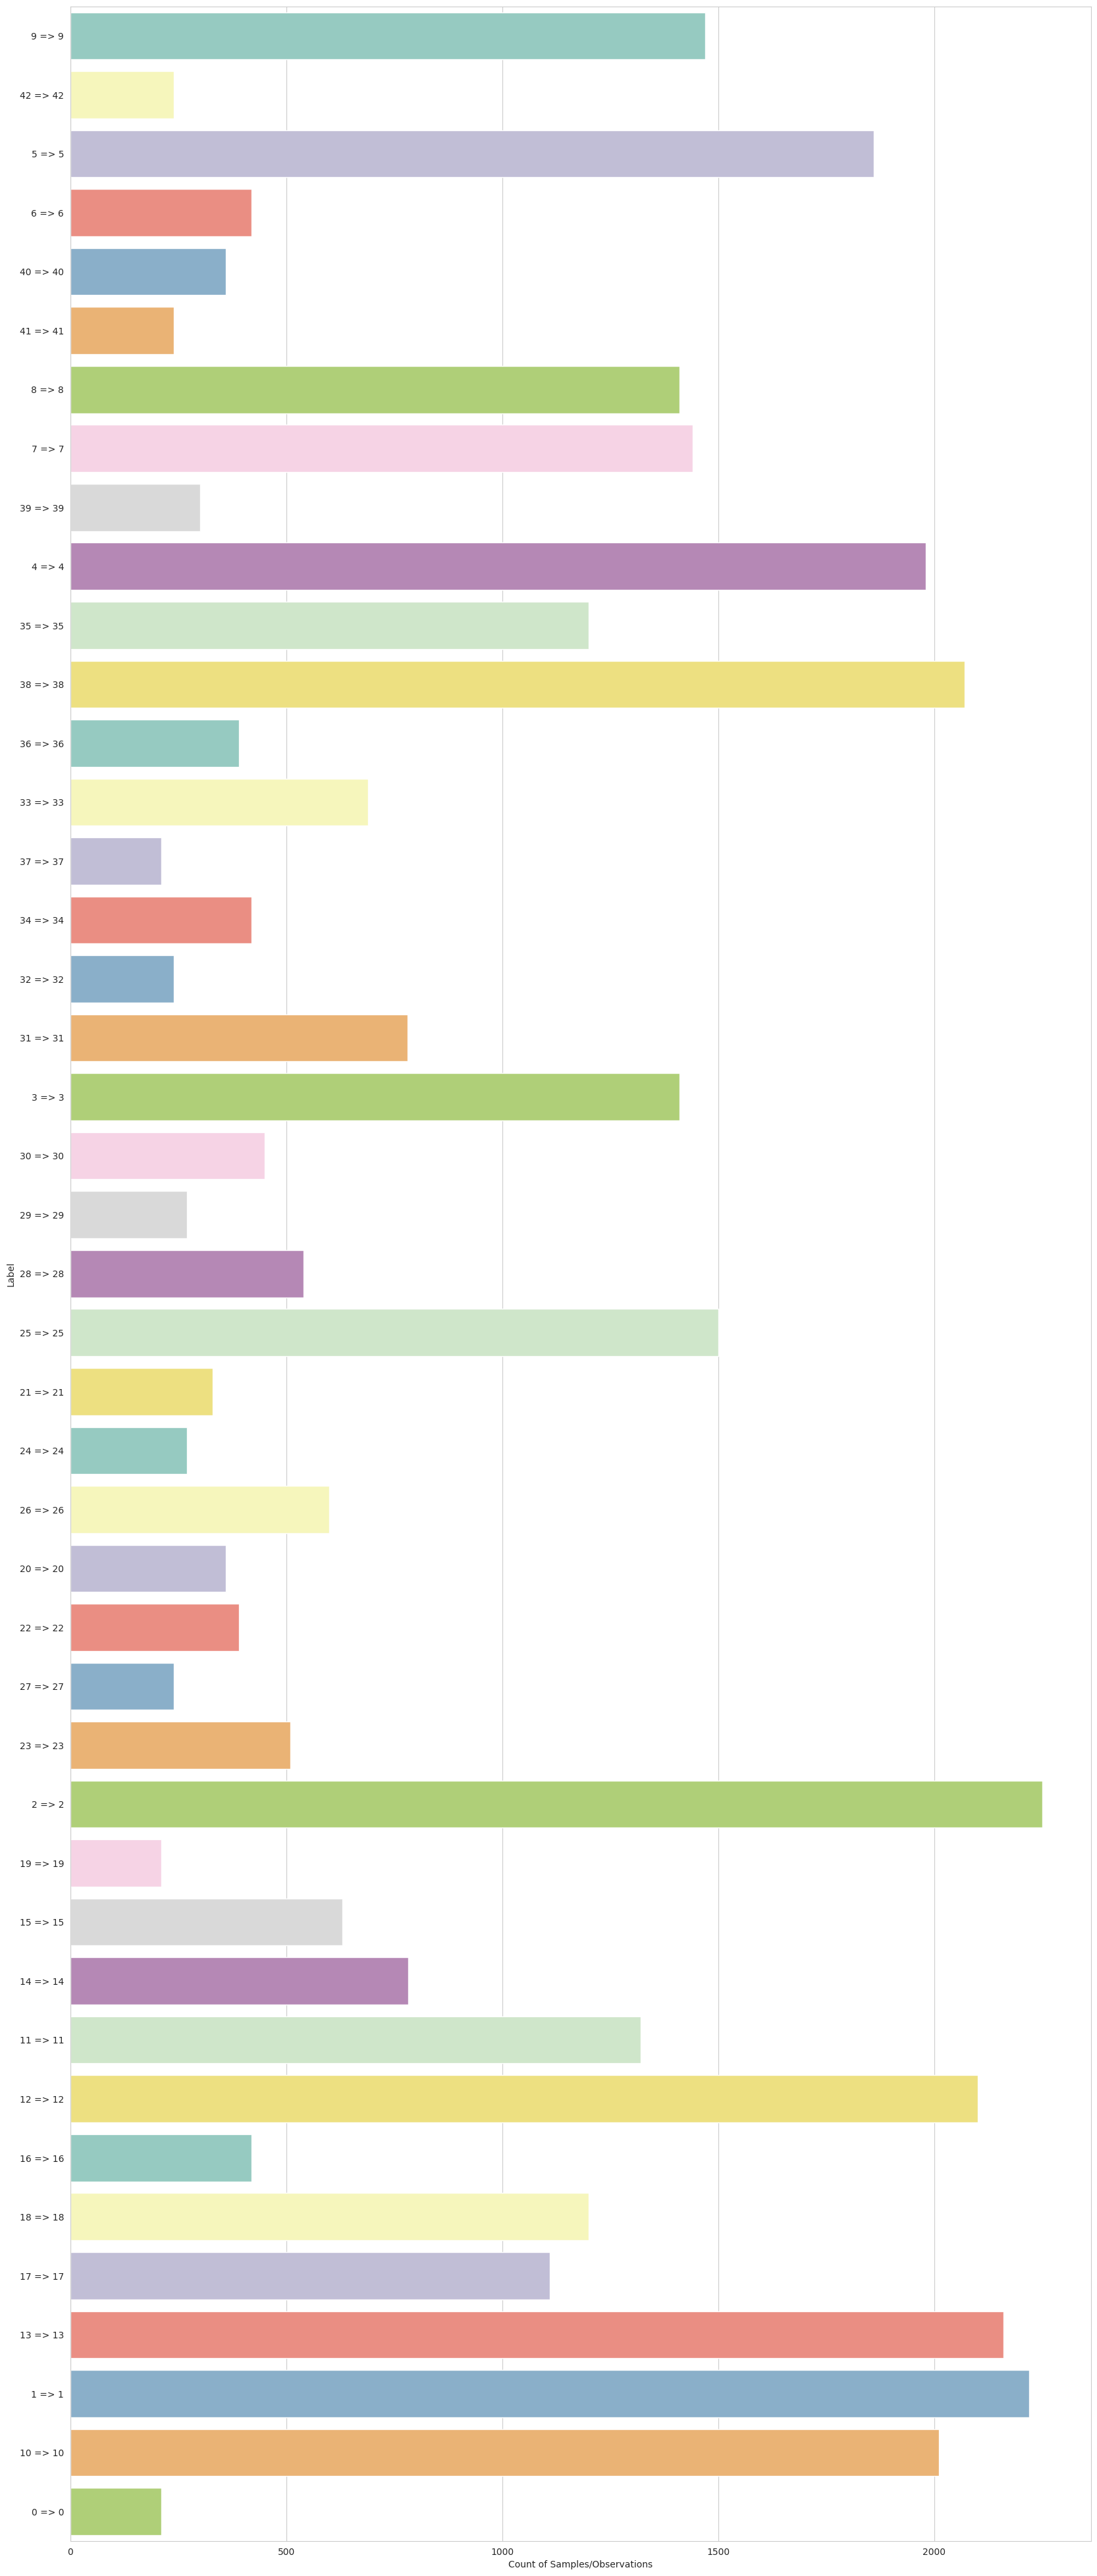

In [ ]:
start = time.time()

input_path = "/content/drive/MyDrive/road"

image_data = []
image_labels = []
lab = pd.read_csv('/content/drive/MyDrive/road/Meta.csv')
d = dict()
class_labels = dict()
for dirs in os.listdir(input_path + '/Train'):
    count = len(os.listdir(input_path + '/Train/' + dirs))
    d[dirs + ' => ' + str(lab[lab.ClassId == int(dirs)].values[0][1])] = count
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]

plt.figure(figsize=(20, 50))
sns.barplot(y=list(d.keys()), x=list(d.values()), palette='Set3')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations')

In [ ]:
total_classes = 43
height = 32
width = 32
channels = 3

for i in range(total_classes):
    path = input_path + "/Train/" + str(i)+'/'
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, "RGB")
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in Image loading")

In [ ]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)
end = time.time()
print("Time taken: ", round(end-start, 5), "seconds")

Time taken:  811.73636 seconds


In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

In [ ]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31368, 32, 32, 3)
X_valid.shape (7843, 32, 32, 3)
y_train.shape (31368,)
y_valid.shape (7843,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

In [ ]:
print(y_train.shape)
print(y_valid.shape)

keras.backend.clear_session() # Clearing previous session if there was any
np.random.seed(2666)

(31368, 43)
(7843, 43)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=18, kernel_size=(5,5), strides=1, activation="relu",
                        input_shape=(height, width, channels)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5,5), strides=1, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5, 5), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(1,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=72, activation="relu"),
    keras.layers.Dense(units=43, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 18)        1368      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 18)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 36)        16236     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 36)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 36)          32436     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 36)          0

In [ ]:
plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Epoch 1/10
981/981 [==============================] - 28s 28ms/step - loss: 1.4073 - accuracy: 0.6122 - val_loss: 0.4578 - val_accuracy: 0.8691
Epoch 2/10
981/981 [==============================] - 26s 26ms/step - loss: 0.2859 - accuracy: 0.9233 - val_loss: 0.2126 - val_accuracy: 0.9426
Epoch 3/10
981/981 [==============================] - 26s 26ms/step - loss: 0.1381 - accuracy: 0.9639 - val_loss: 0.1351 - val_accuracy: 0.9651
Epoch 4/10
981/981 [==============================] - 26s 26ms/step - loss: 0.0919 - accuracy: 0.9764 - val_loss: 0.1252 - val_accuracy: 0.9670
Epoch 5/10
981/981 [==============================] - 26s 26ms/step - loss: 0.0666 - accuracy: 0.9823 - val_loss: 0.0843 - val_accuracy: 0.9825
Epoch 6/10
981/981 [==============================] - 26s 26ms/step - loss: 0.0502 - accuracy: 0.9866 - val_loss: 0.1025 - val_accuracy: 0.9731
Epoch 7/10
981/981 [==============================] - 25s 26ms/step - loss: 0.0473 - accuracy: 0.9865 - val_loss: 0.0742 - val_accuracy:

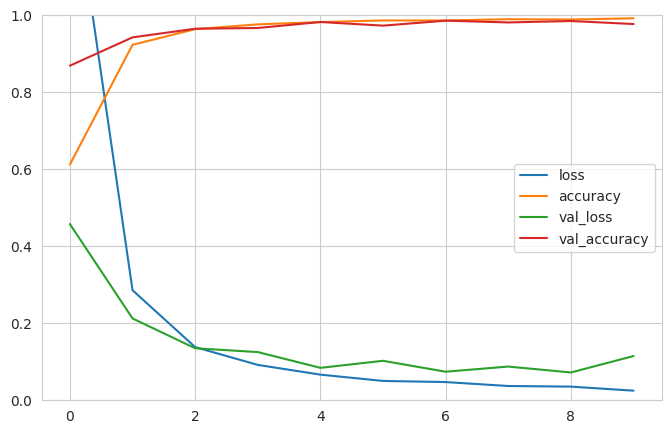

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
validation_data = (X_valid, y_valid)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.save('TSC_model.h5')

In [ ]:
loss, acc = model.evaluate(X_valid, y_valid)
print('Accuracy: ', acc, '\nLoss    : ', loss)

246/246 [==============================] - 2s 9ms/step - loss: 0.1149 - accuracy: 0.9773
Accuracy:  0.9773045778274536 
Loss    :  0.11490440368652344


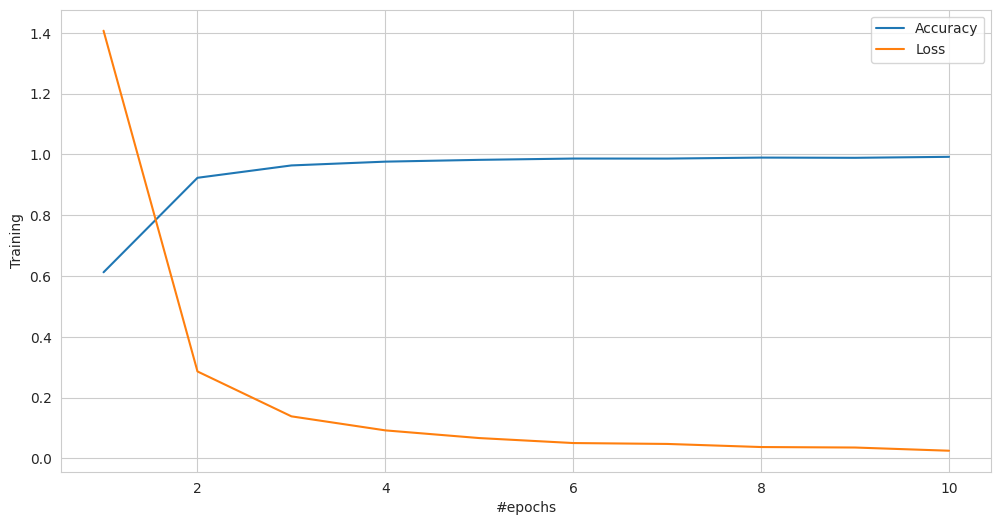

In [ ]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

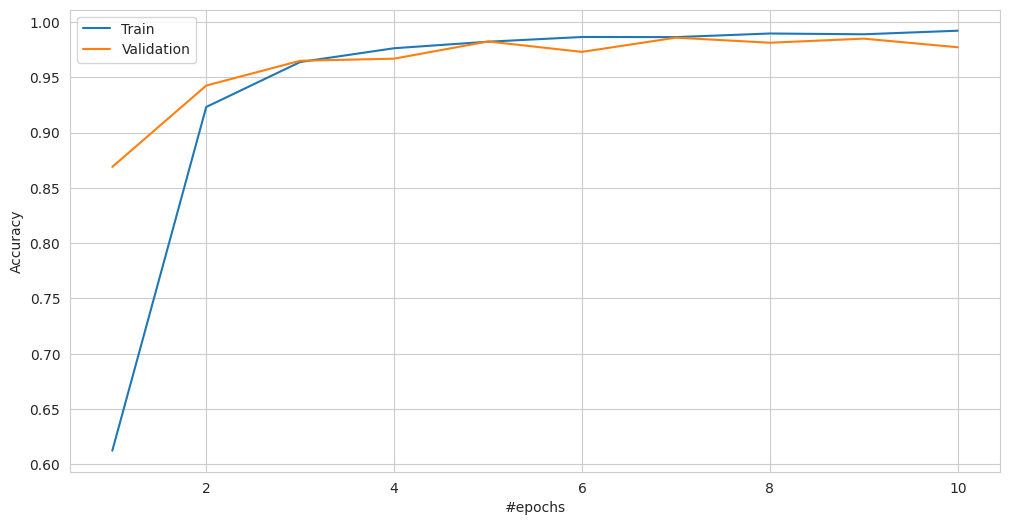

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

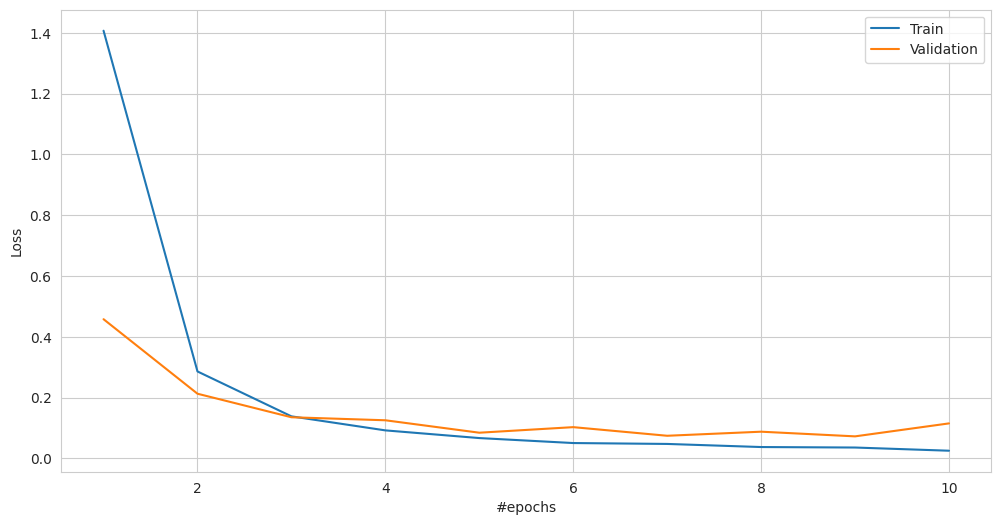

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
pred = np.argmax(model.predict(X_valid), axis=1)
labels = [str(class_labels[i]) for i in range(43)]  # Ensure labels are strings
print(classification_report(np.argmax(y_valid, axis=1), pred, target_names=labels))

246/246 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        34
           1       0.98      0.98      0.98       433
           2       0.99      0.98      0.98       429
           3       0.97      0.99      0.98       306
           4       1.00      0.96      0.98       419
           5       0.98      0.99      0.98       336
           6       1.00      0.94      0.97        98
           7       0.99      0.97      0.98       269
           8       0.95      0.99      0.97       287
           9       0.99      1.00      0.99       288
          10       1.00      0.98      0.99       403
          11       0.95      1.00      0.98       259
          12       0.96      0.99      0.98       407
          13       0.98      0.99      0.99       443
          14       0.99      0.99      0.99       169
          15       0.93      0.99      0.96       122
          16       1.00  

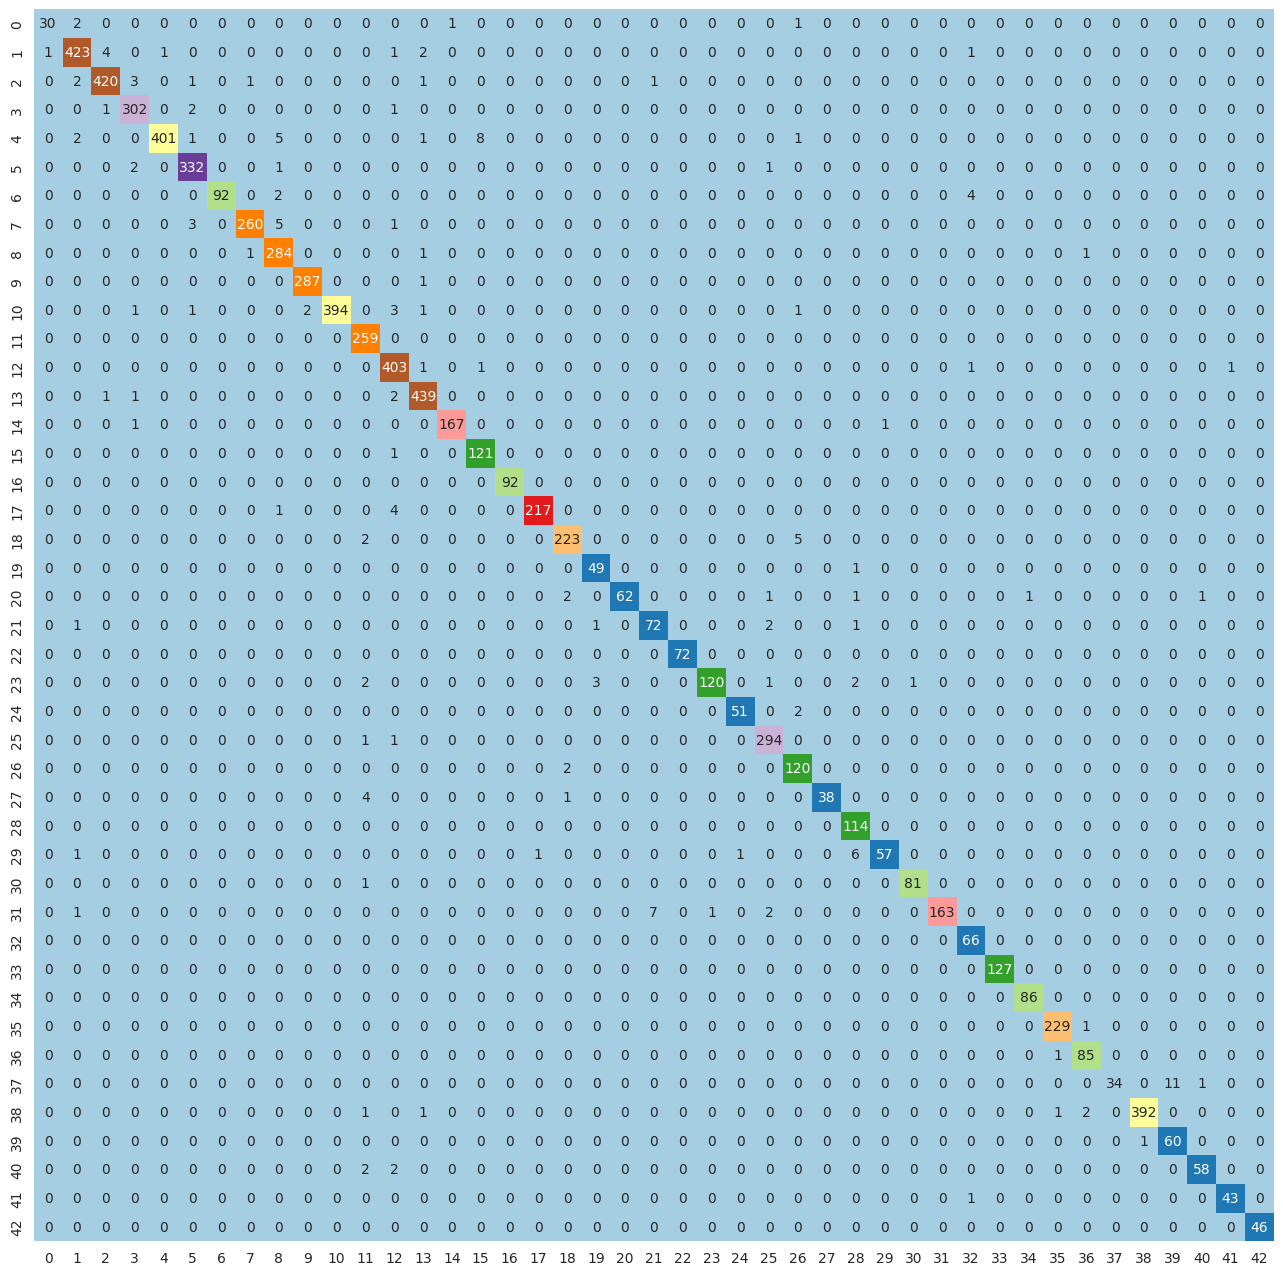

In [ ]:
cmat = confusion_matrix(np.argmax(y_valid, axis=1), pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);

In [ ]:
import pandas as pd
print(pd.__version__)

2.2.2


In [ ]:
!pip install --upgrade pandas

In [ ]:
cls_acc = pd.DataFrame(
    {'Class_Label': [class_labels[i] for i in range(43)],
     'Accuracy': classwise_acc.tolist()},
    columns=['Class_Label', 'Accuracy']
)
cls_acc = cls_acc.reset_index(drop=True)  # Remove the index
cls_acc.style.format({"Accuracy": "{:,.2f}"}).bar(subset=["Accuracy"], color='tomato')



,Class_Label,Accuracy
0,0,88.24
1,1,97.69
2,2,97.90
3,3,98.69
4,4,95.70
5,5,98.81
6,6,93.88
7,7,96.65
8,8,98.95
9,9,99.65


In [ ]:
test = pd.read_csv(input_path + "/Test.csv")

labels = test["ClassId"].values
test_imgs = test["Path"].values

(1, 32, 32, 3)
9


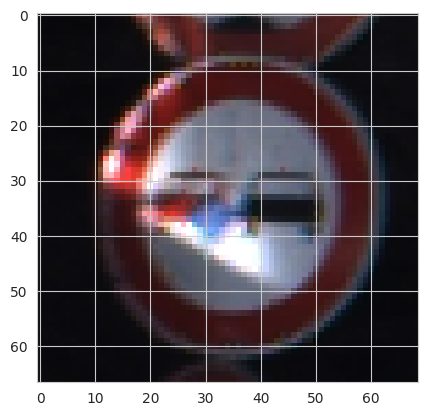

In [ ]:
img_index = 450

image = Image.open(input_path +'/'+ test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img) / 255.
img = img.reshape(1, height, width, channels)

print(img.shape)
print(labels[img_index])
plt.imshow(image)

In [ ]:
classes = {
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)',
    2:'Speed limit (50km/h)',
    3:'Speed limit (60km/h)',
    4:'Speed limit (70km/h)',
    5:'Speed limit (80km/h)',
    6:'End of speed limit (80km/h)',
    7:'Speed limit (100km/h)',
    8:'Speed limit (120km/h)',
    9:'No passing',
    10:'No passing veh over 3.5 tons',
    11:'Right-of-way at intersection',
    12:'Priority road',
    13:'Yield',
    14:'Stop',
    15:'No vehicles',
    16:'Veh > 3.5 tons prohibited',
    17:'No entry',
    18:'General caution',
    19:'Dangerous curve left',
    20:'Dangerous curve right',
    21:'Double curve',
    22:'Bumpy road',
       23:'Slippery road',
    24:'Road narrows on the right',
    25:'Road work',
    26:'Traffic signals',
    27:'Pedestrians',
    28:'Children crossing',
    29:'Bicycles crossing',
    30:'Beware of ice/snow',
    31:'Wild animals crossing',
    32:'End speed + passing limits',
    33:'Turn right ahead',
    34:'Turn left ahead',
    35:'Ahead only',
    36:'Go straight or right',
    37:'Go straight or left',
    38:'Keep right',
    39:'Keep left',
    40:'Roundabout mandatory',
    41:'End of no passing',
    42:'End no passing veh > 3.5 tons'
          }

In [ ]:
pred = np.argmax(model.predict(img), axis=1)[0]  # Get the predicted class index
print(pred)

sign = classes[pred]  # Map the predicted index to the corresponding class label
print(sign)

1/1 [==============================] - 0s 44ms/step
9
No passing


In [ ]:
start = time.time()
test = pd.read_csv(input_path +'/'+ 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []
for img in imgs:
    try:
        image = cv2.imread('/content/drive/MyDrive/road/Test/')
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")

X_test = np.array(data)
X_test = X_test / 255

Streaming output truncated to the last 5000 lines.
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
E

In [ ]:
# Prediction of test set
pred = model.predict_classes(X_test)

#Accuracy with the test data
print(accuracy_score(labels, pred))
end = time.time()
print("Time taken: ", round(end-start,5), "seconds")